# UTKFace

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn

import mydata
from mymodels import TransDataset, LoadDataset, EfficientB3Model, ResNet50Model, VGG16Model
from training import ModelTrainer

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

ycol="labels"
batch_size = 8

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (200, 200)


# Efficientnet

In [4]:
model_name = "efficientnet"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

Validation Accuracy: 0.8687 | Loss: 0.3142 | F1: 0.8669
Validation Accuracy: 0.8867 | Loss: 0.2559 | F1: 0.8792
Validation Accuracy: 0.8922 | Loss: 0.2554 | F1: 0.8849
Validation Accuracy: 0.9027 | Loss: 0.2185 | F1: 0.8997
Validation Accuracy: 0.9048 | Loss: 0.2266 | F1: 0.9061
Validation Accuracy: 0.9140 | Loss: 0.2110 | F1: 0.9143
Validation Accuracy: 0.9081 | Loss: 0.2151 | F1: 0.9065
Validation Accuracy: 0.9216 | Loss: 0.1877 | F1: 0.9221
Validation Accuracy: 0.9128 | Loss: 0.2380 | F1: 0.9116
Validation Accuracy: 0.9065 | Loss: 0.2509 | F1: 0.9016
Validation Accuracy: 0.8951 | Loss: 0.2706 | F1: 0.9021
Validation Accuracy: 0.9253 | Loss: 0.1816 | F1: 0.9256
Validation Accuracy: 0.8972 | Loss: 0.2676 | F1: 0.9034
Validation Accuracy: 0.9174 | Loss: 0.2027 | F1: 0.9165
Validation Accuracy: 0.9258 | Loss: 0.1879 | F1: 0.9249
Validation Accuracy: 0.9258 | Loss: 0.1952 | F1: 0.9277
Validation Accuracy: 0.9195 | Loss: 0.2168 | F1: 0.9175
Validation Accuracy: 0.9123 | Loss: 0.2395 | F1:

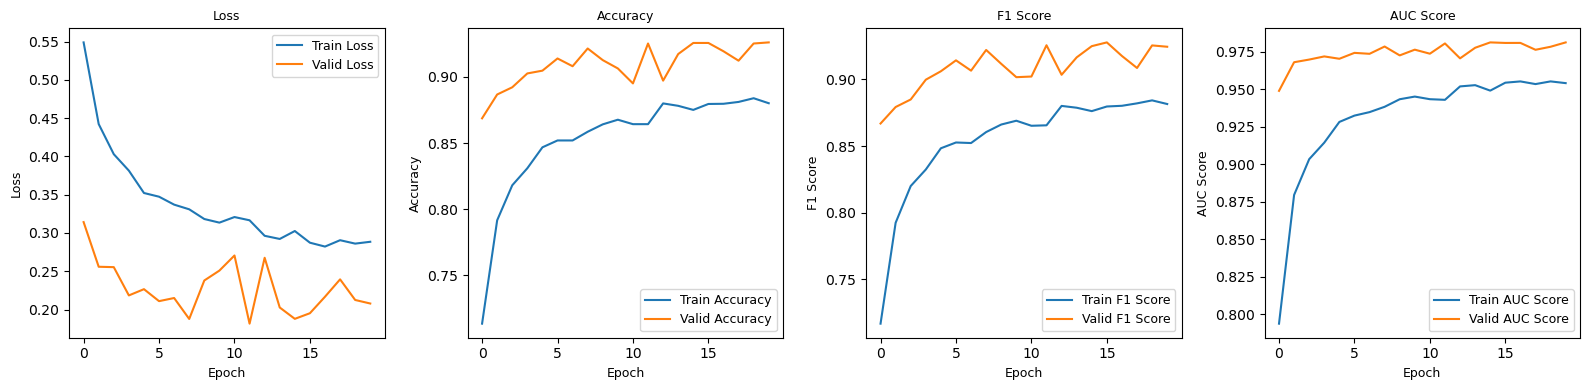

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB3Model().to(device) # model -> GPU

# Train the model
num_epochs = 20
lr = 0.0001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [6]:
model = EfficientB3Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1181
           1       0.93      0.92      0.93      1203

    accuracy                           0.93      2384
   macro avg       0.93      0.93      0.93      2384
weighted avg       0.93      0.93      0.93      2384

Skin tone 1: Accuracy 0.9309153713298791
Skin tone 3: Accuracy 0.9540816326530612
Skin tone 0: Accuracy 0.9223140495867769
Skin tone 2: Accuracy 0.8954248366013072


In [7]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1171
           1       0.91      0.92      0.92      1177

    accuracy                           0.92      2348
   macro avg       0.92      0.92      0.92      2348
weighted avg       0.92      0.92      0.92      2348

Skin tone 1: Accuracy 0.9408602150537635
Skin tone 3: Accuracy 0.9356521739130435
Skin tone 2: Accuracy 0.8564356435643564
Skin tone 0: Accuracy 0.9310344827586207


# Resnet

In [8]:
model_name = "resnet"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.8498 | Loss: 0.3339 | F1: 0.8419
Validation Accuracy: 0.8754 | Loss: 0.2767 | F1: 0.8801
Validation Accuracy: 0.8846 | Loss: 0.2705 | F1: 0.8875
Validation Accuracy: 0.8817 | Loss: 0.2736 | F1: 0.8838
Validation Accuracy: 0.8792 | Loss: 0.2757 | F1: 0.8789
Validation Accuracy: 0.8813 | Loss: 0.2802 | F1: 0.8862
Validation Accuracy: 0.8897 | Loss: 0.2554 | F1: 0.8956
Validation Accuracy: 0.8935 | Loss: 0.2583 | F1: 0.8907
Validation Accuracy: 0.8851 | Loss: 0.2820 | F1: 0.8907
Validation Accuracy: 0.9044 | Loss: 0.2222 | F1: 0.9034
Validation Accuracy: 0.8729 | Loss: 0.2955 | F1: 0.8638
Validation Accuracy: 0.9039 | Loss: 0.2249 | F1: 0.8993
Validation Accuracy: 0.8981 | Loss: 0.2494 | F1: 0.9035
Validation Accuracy: 0.9044 | Loss: 0.2191 | F1: 0.9049
Validation Accuracy: 0.9010 | Loss: 0.2380 | F1: 0.8981
Validation Accuracy: 0.9035 | Loss: 0.2203 | F1: 0.9042
Validation Accuracy: 0.9002 | Loss: 0.2253 | F1: 0.8971
Validation Accuracy: 0.9023 | Loss: 0.2341 | F1:

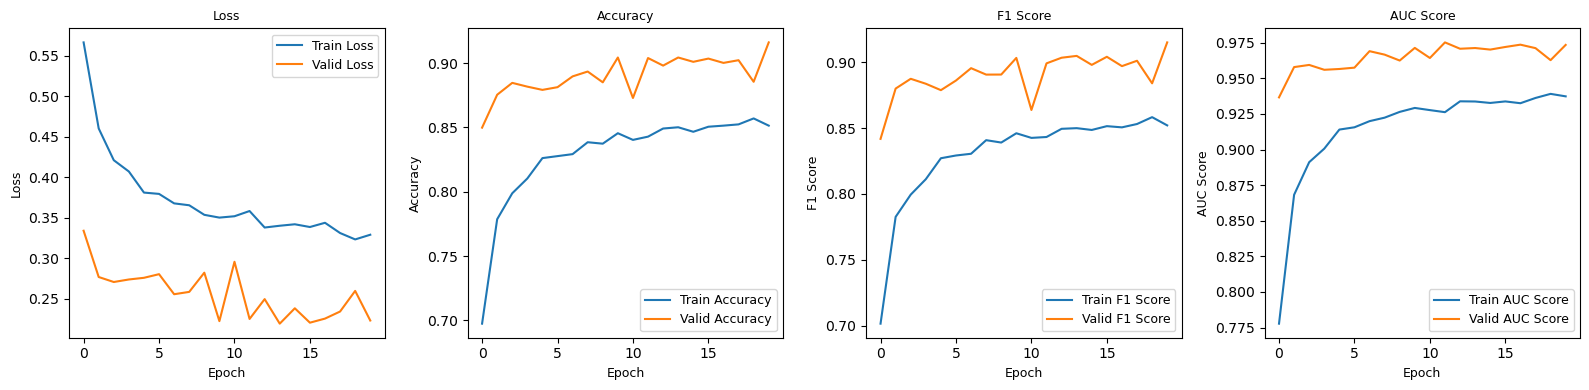

In [9]:
model = ResNet50Model().to(device) # model -> GPU

num_epochs = 20
lr = 0.0001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [10]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1181
           1       0.91      0.90      0.90      1203

    accuracy                           0.90      2384
   macro avg       0.90      0.90      0.90      2384
weighted avg       0.90      0.90      0.90      2384

Skin tone 1: Accuracy 0.9205526770293609
Skin tone 3: Accuracy 0.9285714285714286
Skin tone 0: Accuracy 0.9041322314049587
Skin tone 2: Accuracy 0.8660130718954249


In [11]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1171
           1       0.90      0.90      0.90      1177

    accuracy                           0.90      2348
   macro avg       0.90      0.90      0.90      2348
weighted avg       0.90      0.90      0.90      2348

Skin tone 1: Accuracy 0.9301075268817204
Skin tone 3: Accuracy 0.92
Skin tone 2: Accuracy 0.8547854785478548
Skin tone 0: Accuracy 0.9064039408866995


# VGG

In [12]:
model_name = "vgg"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.5919 | Loss: 0.7943 | F1: 0.6958
Validation Accuracy: 0.7265 | Loss: 0.5517 | F1: 0.7050
Validation Accuracy: 0.7697 | Loss: 0.4731 | F1: 0.7673
Validation Accuracy: 0.7798 | Loss: 0.4526 | F1: 0.7846
Validation Accuracy: 0.8410 | Loss: 0.3840 | F1: 0.8442
Validation Accuracy: 0.8347 | Loss: 0.4254 | F1: 0.8489
Validation Accuracy: 0.7731 | Loss: 0.5308 | F1: 0.8063
Validation Accuracy: 0.8490 | Loss: 0.3349 | F1: 0.8394
Validation Accuracy: 0.8448 | Loss: 0.3629 | F1: 0.8540
Validation Accuracy: 0.8440 | Loss: 0.3411 | F1: 0.8564
Validation Accuracy: 0.8708 | Loss: 0.3055 | F1: 0.8694
Validation Accuracy: 0.8654 | Loss: 0.3128 | F1: 0.8676
Validation Accuracy: 0.8771 | Loss: 0.3244 | F1: 0.8744
Validation Accuracy: 0.8834 | Loss: 0.2772 | F1: 0.8868
Validation Accuracy: 0.8700 | Loss: 0.2834 | F1: 0.8677
Validation Accuracy: 0.8691 | Loss: 0.3145 | F1: 0.8634
Validation Accuracy: 0.8771 | Loss: 0.2814 | F1: 0.8801
Validation Accuracy: 0.8805 | Loss: 0.3111 | F1:

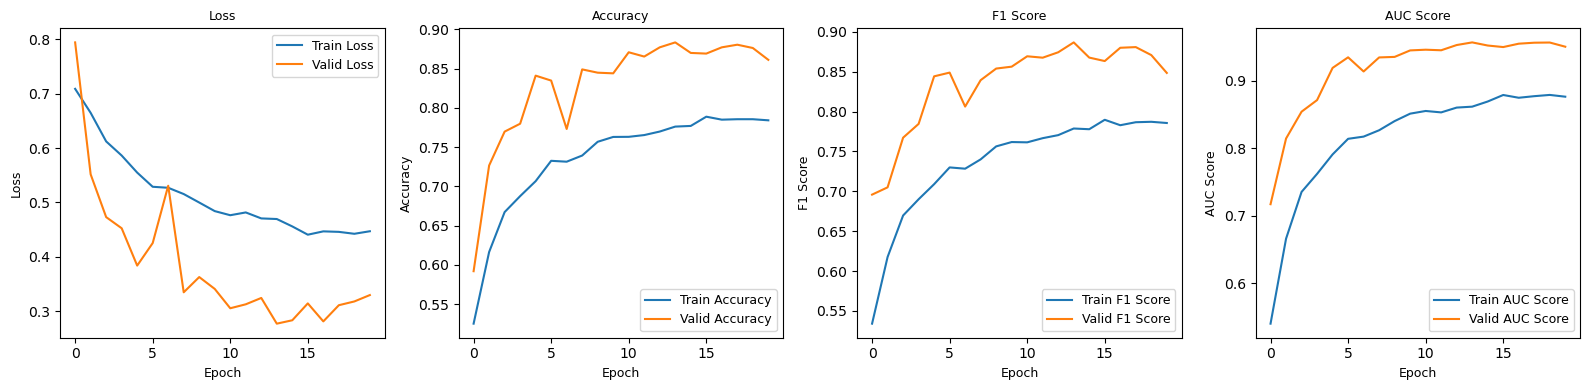

In [13]:
model = VGG16Model().to(device) # model -> GPU

num_epochs = 20
lr = 0.0001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [14]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1181
           1       0.87      0.91      0.89      1203

    accuracy                           0.88      2384
   macro avg       0.88      0.88      0.88      2384
weighted avg       0.88      0.88      0.88      2384

Skin tone 1: Accuracy 0.8998272884283247
Skin tone 3: Accuracy 0.9064625850340136
Skin tone 0: Accuracy 0.8677685950413223
Skin tone 2: Accuracy 0.8611111111111112


In [15]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1171
           1       0.86      0.90      0.88      1177

    accuracy                           0.88      2348
   macro avg       0.88      0.88      0.88      2348
weighted avg       0.88      0.88      0.88      2348

Skin tone 1: Accuracy 0.9121863799283154
Skin tone 3: Accuracy 0.9060869565217391
Skin tone 2: Accuracy 0.8217821782178217
Skin tone 0: Accuracy 0.8669950738916257


/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
